**Research Question:** Is Action the main factor of the genre that affects the popularity of the game?

**Null Hypothesis:** Action is not the main factor of the genre that affects the popularity of the game

**Alternative Hypothesis:** Action is the main factor of the genre that affects the popularity of the game

### Import Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Essential Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Libraries for preprocessing and modeling
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.utils import shuffle
import statsmodels.formula.api as sm

# ignore warnings
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
# read the csv file
data = pd.read_csv("/content/drive/MyDrive/KD and Intro Assignment/videoGames.csv")

In [ ]:
# display the initial dataset
data.head()

,Unnamed: 0,name,url,year,certificate,rating,votes,plot,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller
0,0,Spider-Man,https://www.imdb.com/title/tt5807780/?ref_=adv...,2018.0,T,9.2,"20,759","When a new villain threatens New York City, Pe...",True,True,False,False,False,True,False,False,False
1,1,Red Dead Redemption II,https://www.imdb.com/title/tt6161168/?ref_=adv...,2018.0,M,9.7,"35,703",Amidst the decline of the Wild West at the tur...,True,True,False,True,False,False,False,False,False
2,2,Grand Theft Auto V,https://www.imdb.com/title/tt2103188/?ref_=adv...,2013.0,M,9.5,"59,986",Three very different criminals team up for a s...,True,False,False,True,False,False,False,False,False
3,3,God of War,https://www.imdb.com/title/tt5838588/?ref_=adv...,2018.0,M,9.6,"26,118","After wiping out the gods of Mount Olympus, Kr...",True,True,False,False,False,False,False,False,False
4,4,Uncharted 4: A Thief's End,https://www.imdb.com/title/tt3334704/?ref_=adv...,2016.0,T,9.5,"28,722",Thrown back into the dangerous underworld he'd...,True,True,False,False,False,False,False,False,False


In [ ]:
# display the shape and the information of the variables
print(data.shape)
print(data.info())

(20803, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20803 entries, 0 to 20802
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   20803 non-null  int64  
 1   name         20803 non-null  object 
 2   url          20803 non-null  object 
 3   year         20536 non-null  float64
 4   certificate  7903 non-null   object 
 5   rating       11600 non-null  float64
 6   votes        11600 non-null  object 
 7   plot         20803 non-null  object 
 8   Action       20803 non-null  bool   
 9   Adventure    20803 non-null  bool   
 10  Comedy       20803 non-null  bool   
 11  Crime        20803 non-null  bool   
 12  Family       20803 non-null  bool   
 13  Fantasy      20803 non-null  bool   
 14  Mystery      20803 non-null  bool   
 15  Sci-Fi       20803 non-null  bool   
 16  Thriller     20803 non-null  bool   
dtypes: bool(9), float64(2), int64(1), object(5)
memory usage: 1.4+ MB
None


### Data Preprocessing

In [ ]:
# Drop the first column and url column (remove extra/unrelated column)
data = data.drop(data.columns[[0,2]], axis = 1)

In [ ]:
data.head()

,name,year,certificate,rating,votes,plot,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller
0,Spider-Man,2018.0,T,9.2,"20,759","When a new villain threatens New York City, Pe...",True,True,False,False,False,True,False,False,False
1,Red Dead Redemption II,2018.0,M,9.7,"35,703",Amidst the decline of the Wild West at the tur...,True,True,False,True,False,False,False,False,False
2,Grand Theft Auto V,2013.0,M,9.5,"59,986",Three very different criminals team up for a s...,True,False,False,True,False,False,False,False,False
3,God of War,2018.0,M,9.6,"26,118","After wiping out the gods of Mount Olympus, Kr...",True,True,False,False,False,False,False,False,False
4,Uncharted 4: A Thief's End,2016.0,T,9.5,"28,722",Thrown back into the dangerous underworld he'd...,True,True,False,False,False,False,False,False,False


In [ ]:
# change boolean values to int values (labelling)
labelencoder = LabelEncoder()

for i in range(6,15):
  data.iloc[:,i] = labelencoder.fit_transform(data.iloc[:,i])

In [ ]:
# drop data that have null value of year
data = data.dropna(subset = ["year"])

In [ ]:
# drop data that have null value in both rating and votes
data = data.dropna(subset = ["rating", "votes"], how = "all")

In [ ]:
# convert year data type from float to int
data.loc[:,("year")] = data.loc[:,("year")].apply(np.int64)

In [ ]:
# convert votes data type from object to int
data['votes'] = data['votes'].astype(str)
data['votes'] = data['votes'].apply(lambda x: float(x.split()[0].replace(',', '')))
data['votes'] = data['votes'].astype(int)

In [ ]:
# create a new column to see the years of production of game
data["Years of Production"] = 2022 - data["year"]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11599 entries, 0 to 20791
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 11599 non-null  object 
 1   year                 11599 non-null  int64  
 2   certificate          6599 non-null   object 
 3   rating               11599 non-null  float64
 4   votes                11599 non-null  int64  
 5   plot                 11599 non-null  object 
 6   Action               11599 non-null  int64  
 7   Adventure            11599 non-null  int64  
 8   Comedy               11599 non-null  int64  
 9   Crime                11599 non-null  int64  
 10  Family               11599 non-null  int64  
 11  Fantasy              11599 non-null  int64  
 12  Mystery              11599 non-null  int64  
 13  Sci-Fi               11599 non-null  int64  
 14  Thriller             11599 non-null  int64  
 15  Years of Production  11599 non-null 

In [ ]:
data.head()

,name,year,certificate,rating,votes,plot,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller,Years of Production
0,Spider-Man,2018,T,9.2,20759,"When a new villain threatens New York City, Pe...",1,1,0,0,0,1,0,0,0,4
1,Red Dead Redemption II,2018,M,9.7,35703,Amidst the decline of the Wild West at the tur...,1,1,0,1,0,0,0,0,0,4
2,Grand Theft Auto V,2013,M,9.5,59986,Three very different criminals team up for a s...,1,0,0,1,0,0,0,0,0,9
3,God of War,2018,M,9.6,26118,"After wiping out the gods of Mount Olympus, Kr...",1,1,0,0,0,0,0,0,0,4
4,Uncharted 4: A Thief's End,2016,T,9.5,28722,Thrown back into the dangerous underworld he'd...,1,1,0,0,0,0,0,0,0,6


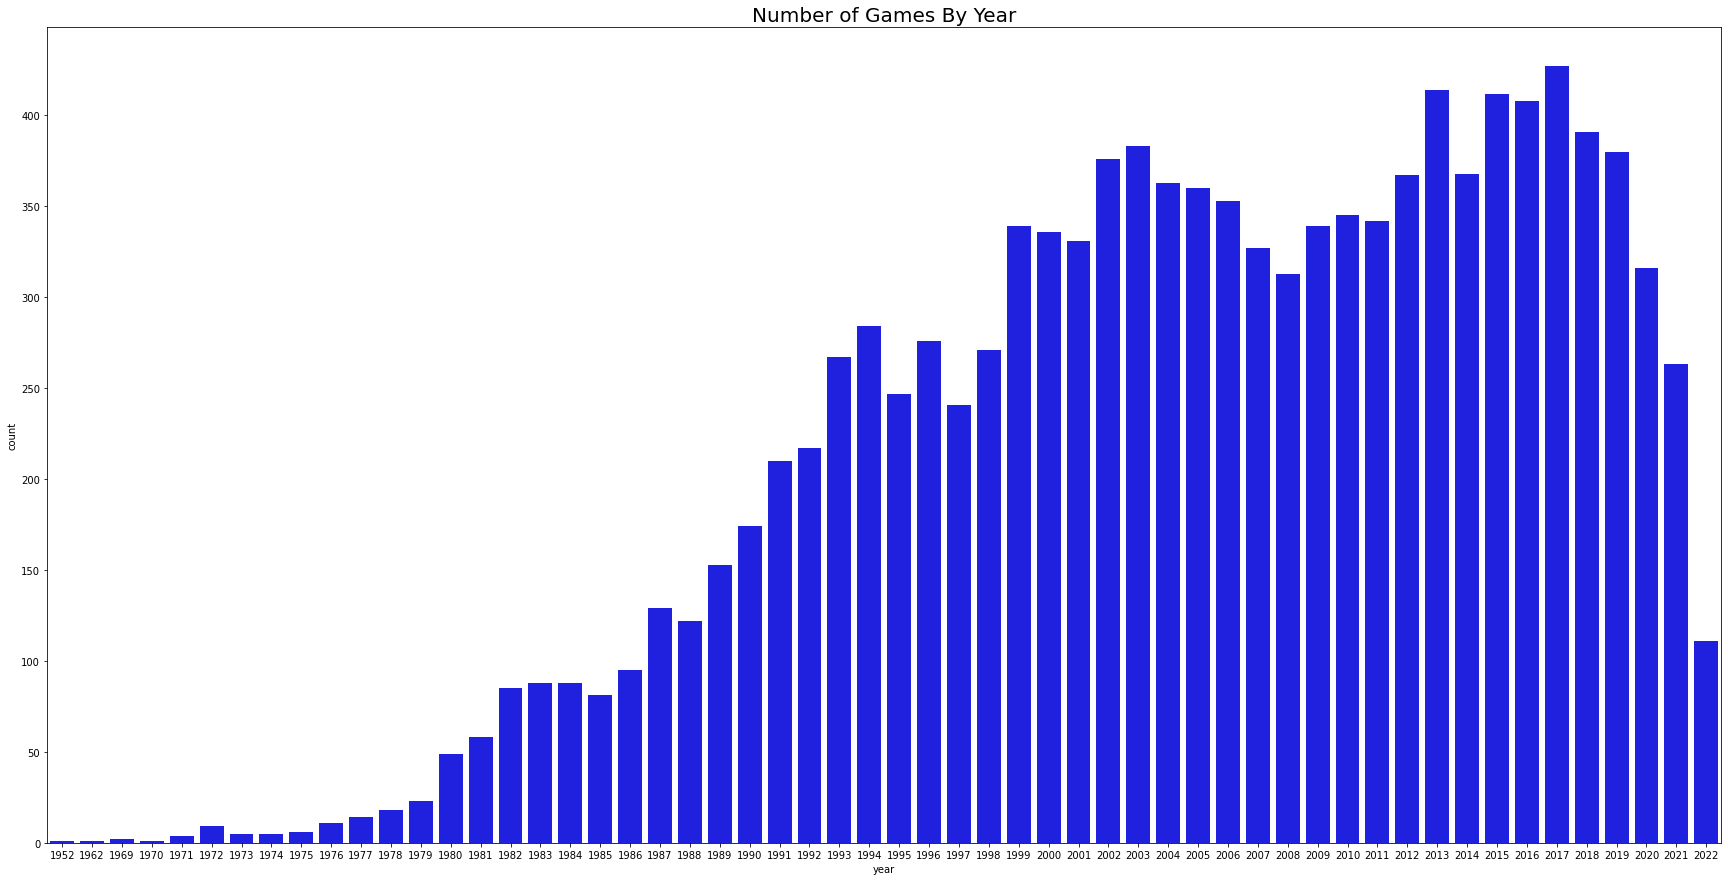

In [ ]:
plt.figure(figsize = (30,15))
plt.title("Number of Games By Year", fontsize = 20)
sns.countplot(x = data.year, color = "blue")

Based on the graph, it shows that year 2017 produced the most amount of games followed by year 2013

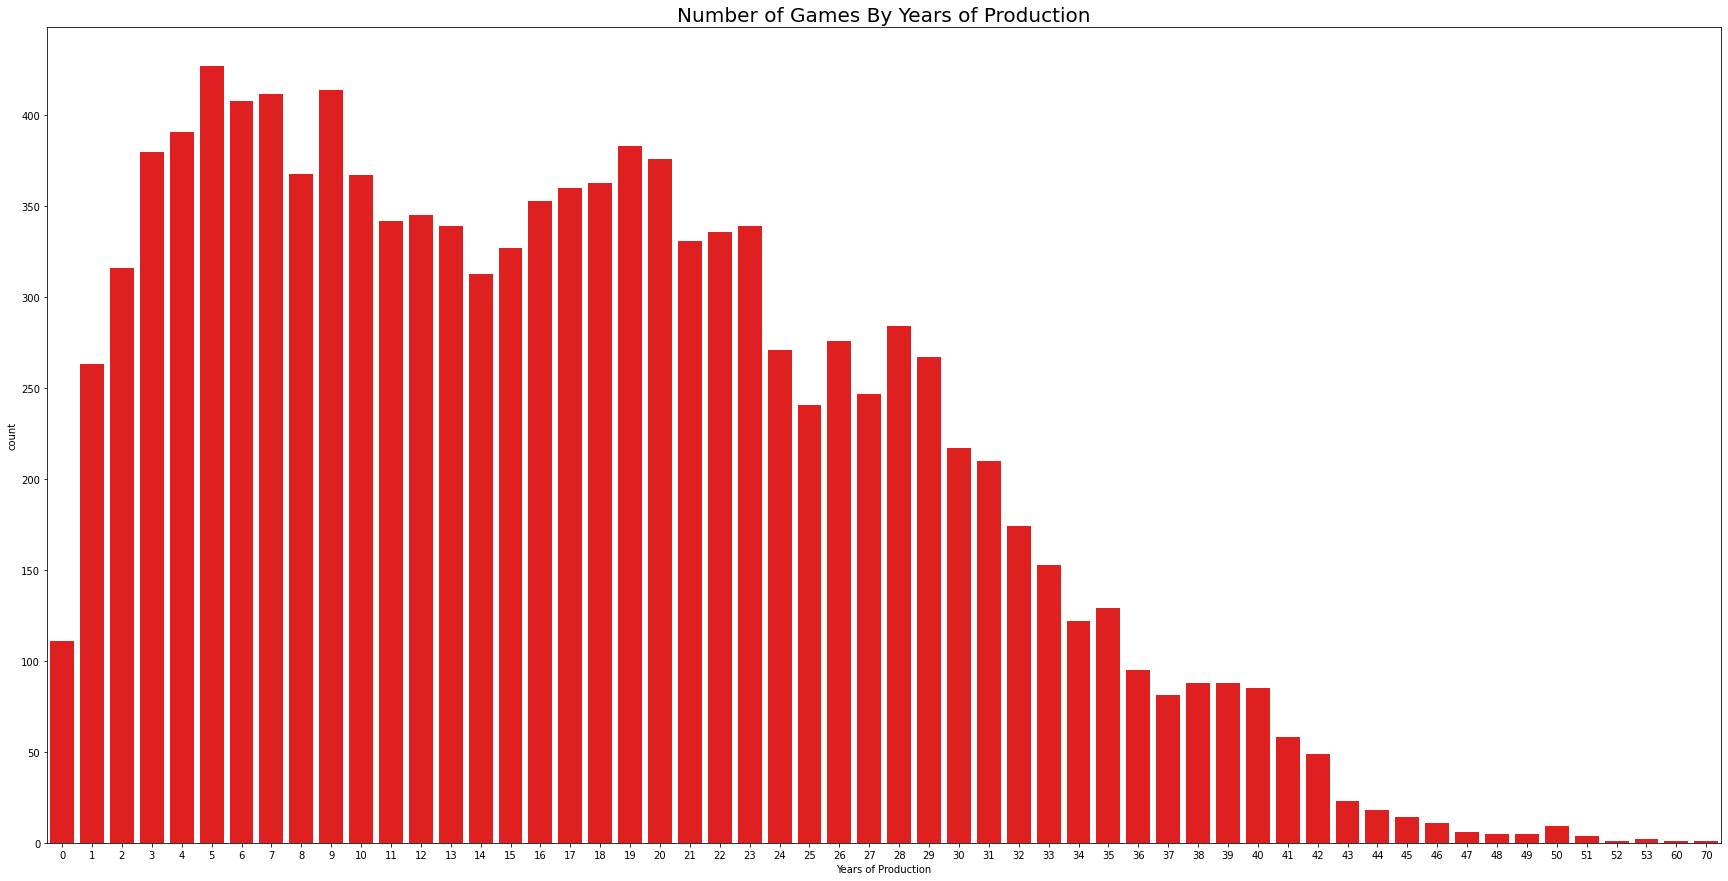

In [ ]:
plt.figure(figsize = (30,15))
plt.title("Number of Games By Years of Production", fontsize = 20)
sns.countplot(x = data["Years of Production"], color = "red")

Based on the graph, most of the games are released for 5 years followed by 9 years.

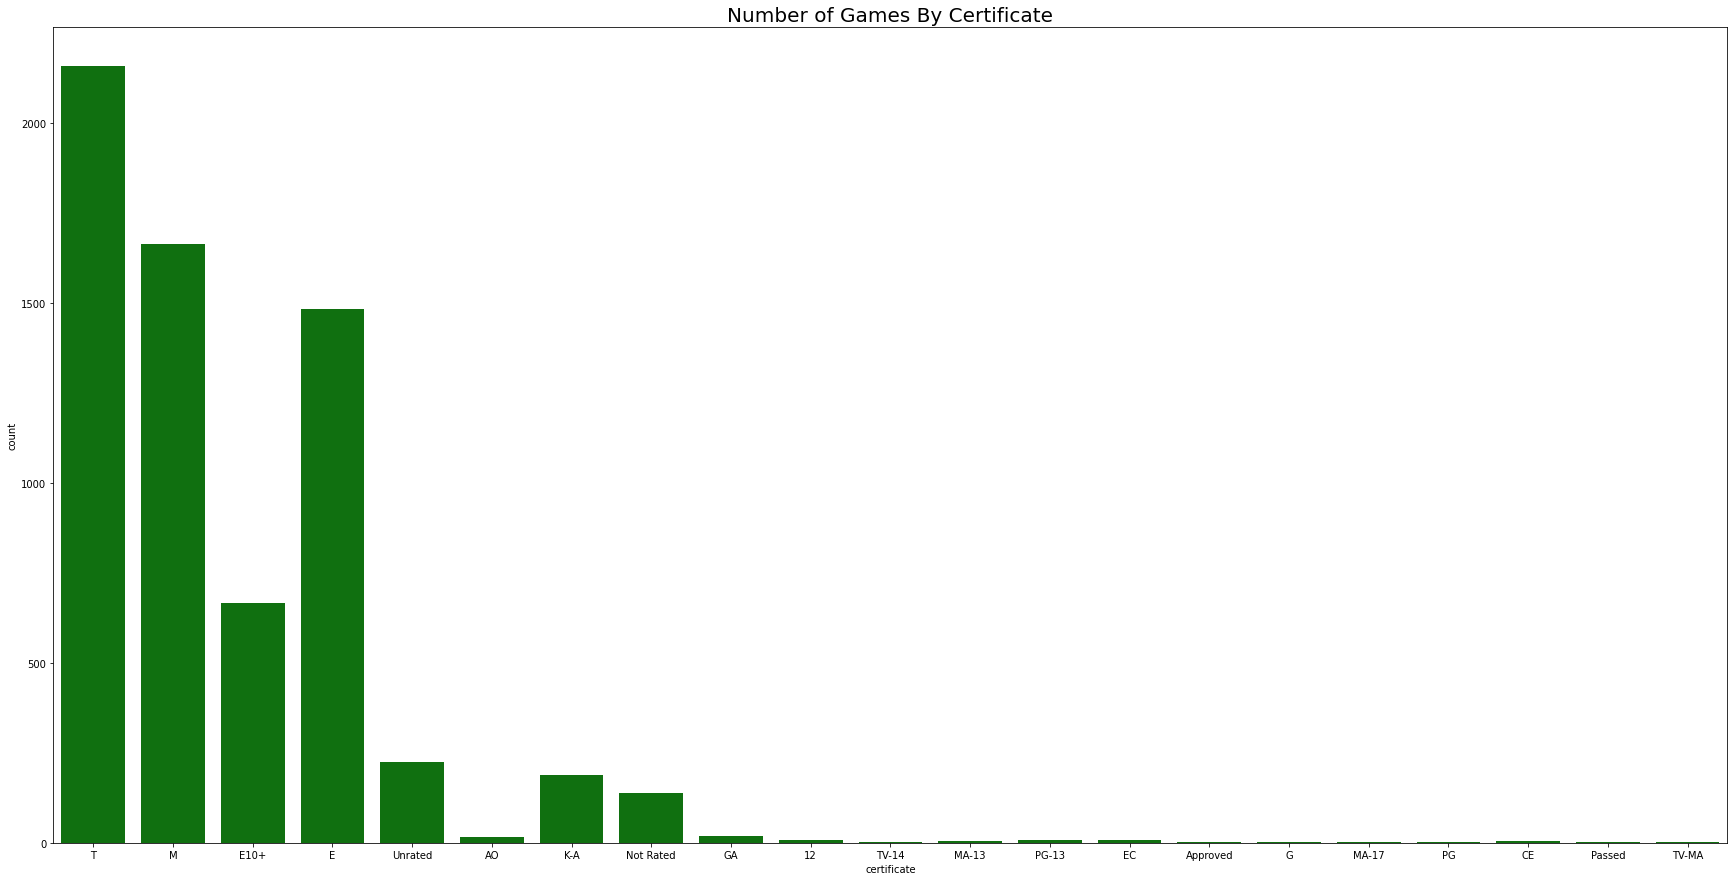

In [ ]:
plt.figure(figsize = (30,15))
plt.title("Number of Games By Certificate", fontsize = 20)
sns.countplot(x = data.certificate, color = "green")

Based on the graph, it shows that the category 'T' (Teenager) has the most amount of games followed by category 'M' (Mature)

### Deep dive into Genres

In [ ]:
genres = (data.iloc[:,6:15] == 1).sum()
genre = []
label_genre = np.array(data.columns[6:15])

for i in genres:
  genre.append(i)

genre = np.array(genre)

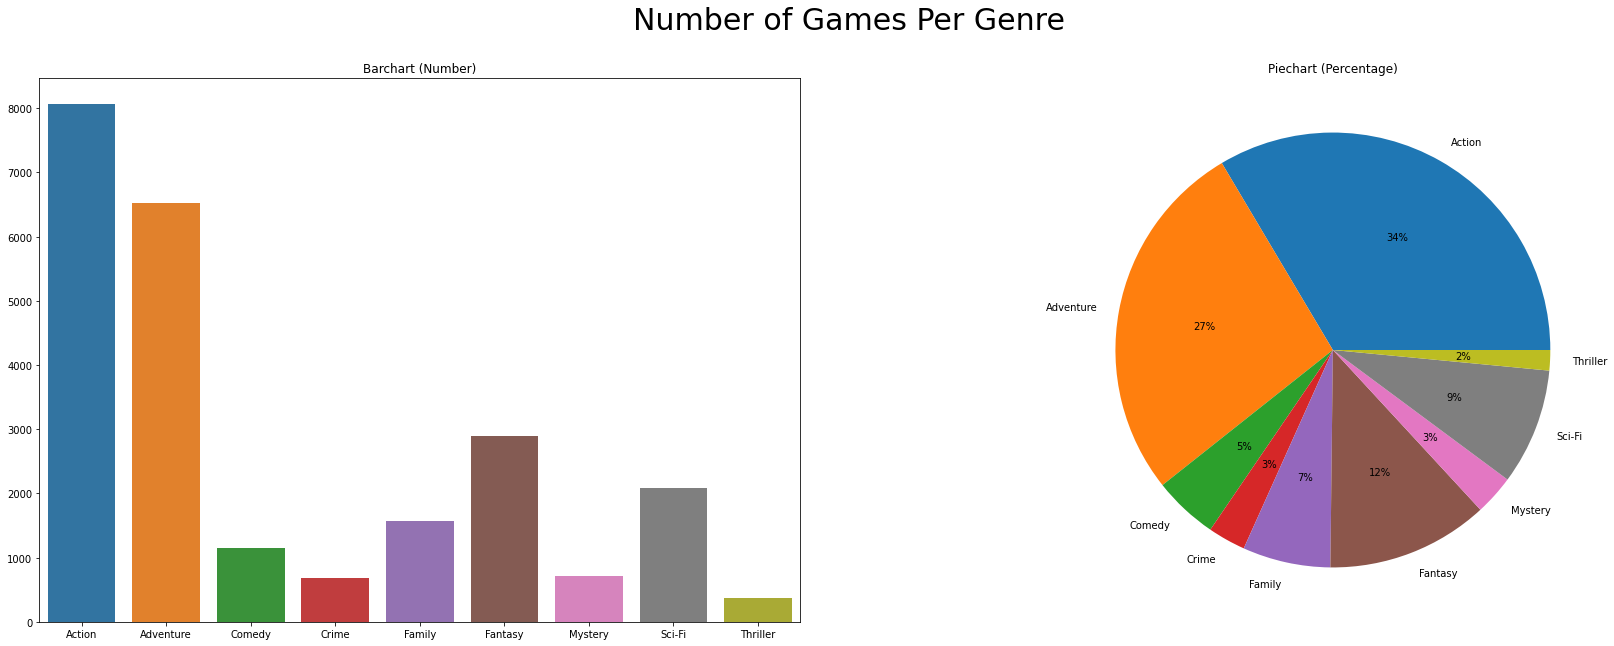

In [ ]:
plt.figure(figsize = (30,10))
plt.suptitle("Number of Games Per Genre", fontsize = 30)
plt.subplot(1,2,1)
plt.title("Barchart (Number)")
sns.barplot(y = genre, x = label_genre)

plt.subplot(1,2,2)
plt.title("Piechart (Percentage)")
plt.pie(genre, labels = label_genre, autopct='%.0f%%')
plt.show()

Based on the barchart and the piechart, we can see that most of the games are Action games (34%) followed by Adventure (27%)

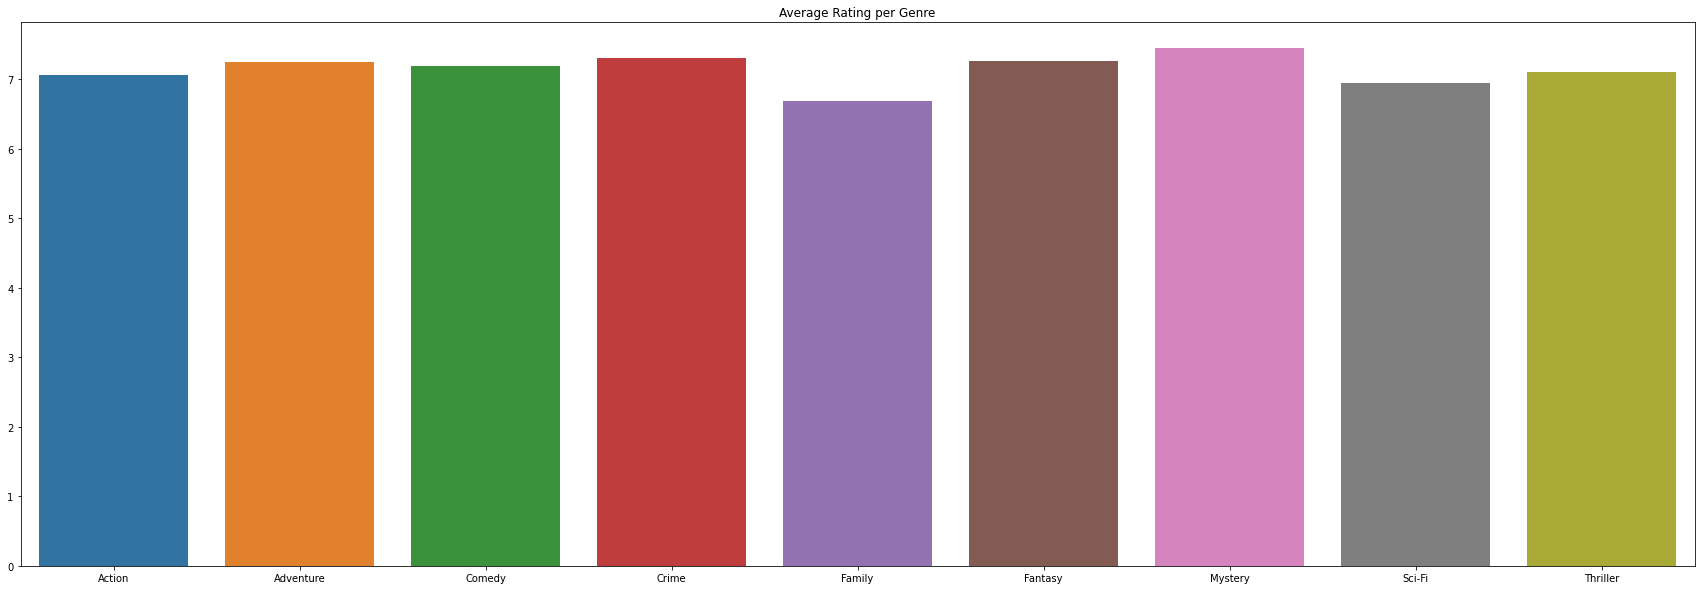

In [ ]:
# display average rating of every genre
avg_rating_genre = []

for i in label_genre:
  group = data.groupby(i)["rating"].mean()
  avg_rating_genre.append(group[1:][1])

avg_rating_genre = np.array(avg_rating_genre)

plt.figure(figsize = (30,10))
plt.title("Average Rating per Genre")
sns.barplot(y = avg_rating_genre, x = label_genre)

In the graph of average rating for every genre, we can see that Mystery has higher average than all of the genre around 7.5

#### Have a check on the number of games based on the query with genres

In [ ]:
data.groupby(["Action","Adventure","Comedy","Crime","Family","Fantasy","Mystery","Sci-Fi","Thriller"])[["name"]].count()

name
Action Adventure Comedy Crime Family Fantasy Mystery Sci-Fi Thriller      
0      0         0      0     0      0       0       0      0            3
                                                            1           33
                                                     1      0          227
                                                            1           18
                                             1       0      0          110
...                                                                    ...
1      1         0      0     0      0       1       0      0           90
                                     1       0       0      0         1474
                              1      0       0       0      0          485
                        1     0      0       0       0      0          198
                 1      0     0      0       0       0      0          482

[98 rows x 1 columns]

In [ ]:
# shows the name of the game with the rating
data[(data["Action"] == 0) &
     (data["Adventure"] == 0) &
     (data["Comedy"] == 0) &
     (data["Crime"] == 0) &
     (data["Family"] == 0) &
     (data["Fantasy"] == 0) &
     (data["Mystery"] == 1) &
     (data["Sci-Fi"] == 1) &
     (data["Thriller"] == 1)][["name","rating"]]

,name,rating
18897,Blade Runner,8.9
18931,The Shapeshifting Detective,7.1
18950,Neuromancer,8.3
18984,D4: Dark Dreams Don't Die,7.3
18989,State of Mind,6.8


In [ ]:
df_genre = data.iloc[:,6:15]

genre = np.array(df_genre.columns)
pairs = [
    ["Adventure","Comedy","Crime","Family","Fantasy","Mystery","Sci-Fi","Thriller"],
    ["Action","Comedy","Crime","Family","Fantasy","Mystery","Sci-Fi","Thriller"],
    ["Action","Adventure","Crime","Family","Fantasy","Mystery","Sci-Fi","Thriller"],
    ["Action","Adventure","Comedy","Family","Fantasy","Mystery","Sci-Fi","Thriller"],
    ["Action","Adventure","Comedy","Crime","Fantasy","Mystery","Sci-Fi","Thriller"],
    ["Action","Adventure","Comedy","Crime","Family","Mystery","Sci-Fi","Thriller"],
    ["Action","Adventure","Comedy","Crime","Family","Fantasy","Sci-Fi","Thriller"],
    ["Action","Adventure","Comedy","Crime","Family","Fantasy","Mystery","Thriller"],
    ["Action","Adventure","Comedy","Crime","Family","Fantasy","Mystery","Sci-Fi"],
]

def count_pair_genre(genre, pairs):
  list_pair = []
  result_pair = []
  for genre, pairs in zip(genre, pairs):
    print(genre)
    for pair in pairs:
      count = df_genre[(df_genre[genre] == 1) & (df_genre[pair] == 1)].count()[genre]
      list_pair.append(count)
      print(f"{pair}:", count)

    result_pair.append(list_pair)
    list_pair = []
    print(" ")

  return result_pair

genre_pair = count_pair_genre(genre, pairs)

Action
Adventure: 4512
Comedy: 672
Crime: 523
Family: 747
Fantasy: 2026
Mystery: 219
Sci-Fi: 1563
Thriller: 223
 
Adventure
Action: 4512
Comedy: 761
Crime: 276
Family: 756
Fantasy: 1993
Mystery: 351
Sci-Fi: 792
Thriller: 75
 
Comedy
Action: 672
Adventure: 761
Crime: 51
Family: 134
Fantasy: 104
Mystery: 20
Sci-Fi: 64
Thriller: 1
 
Crime
Action: 523
Adventure: 276
Comedy: 51
Family: 10
Fantasy: 25
Mystery: 98
Sci-Fi: 27
Thriller: 62
 
Family
Action: 747
Adventure: 756
Comedy: 134
Crime: 10
Fantasy: 215
Mystery: 17
Sci-Fi: 53
Thriller: 4
 
Fantasy
Action: 2026
Adventure: 1993
Comedy: 104
Crime: 25
Family: 215
Mystery: 71
Sci-Fi: 180
Thriller: 3
 
Mystery
Action: 219
Adventure: 351
Comedy: 20
Crime: 98
Family: 17
Fantasy: 71
Sci-Fi: 70
Thriller: 62
 
Sci-Fi
Action: 1563
Adventure: 792
Comedy: 64
Crime: 27
Family: 53
Fantasy: 180
Mystery: 70
Thriller: 72
 
Thriller
Action: 223
Adventure: 75
Comedy: 1
Crime: 62
Family: 4
Fantasy: 3
Mystery: 62
Sci-Fi: 72
 


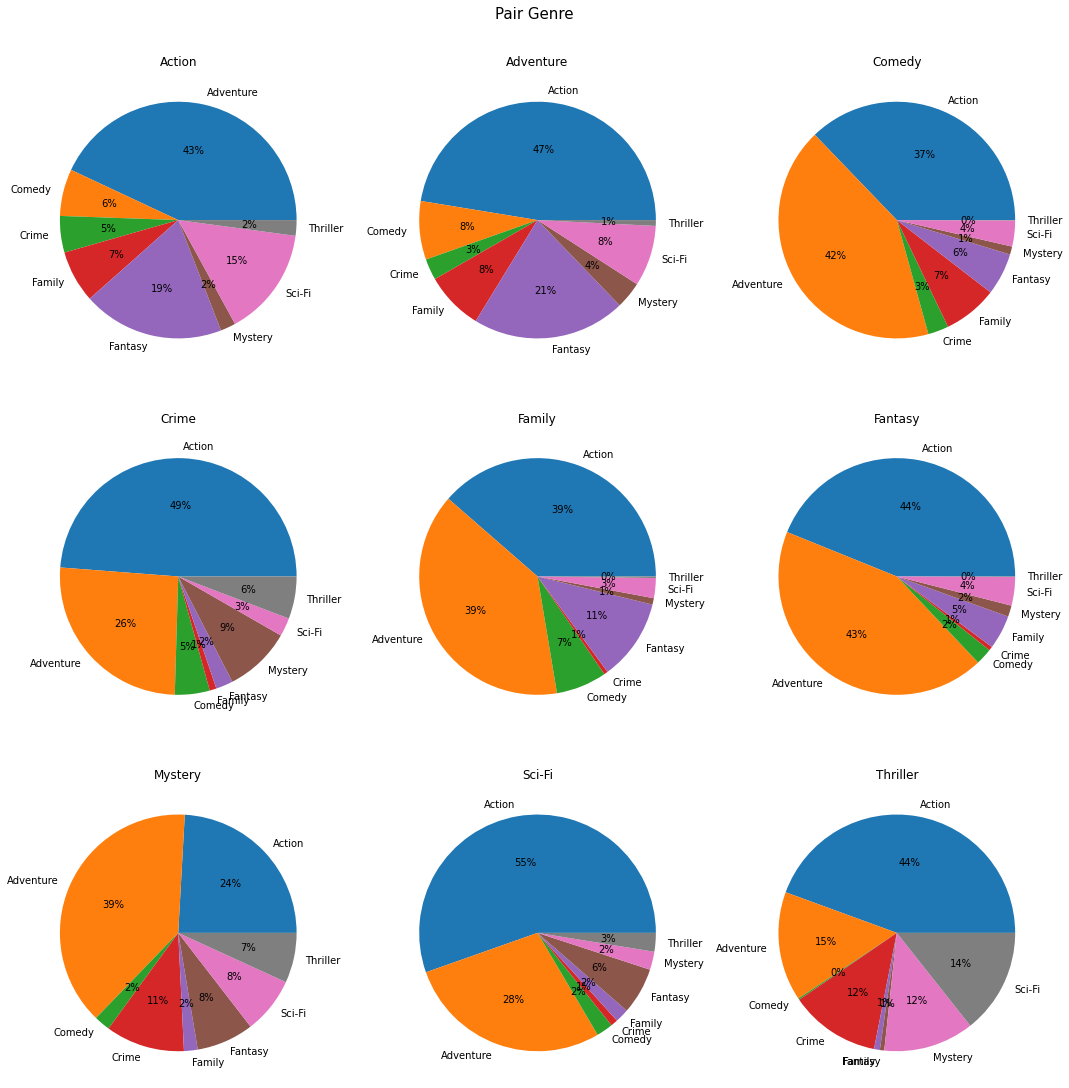

In [ ]:
fig, ax = plt.subplots(3,3, figsize = (15,15))

plt.suptitle("Pair Genre", fontsize = 15, y = 1.02)

for genre, pair_genre_value, label_genre, ax in zip(genre, genre_pair, pairs, ax.flatten()):
  ax.set_title(genre)
  ax.pie(pair_genre_value, labels = label_genre, autopct='%.0f%%')

plt.tight_layout()
plt.show()

Table of genre with associated genre

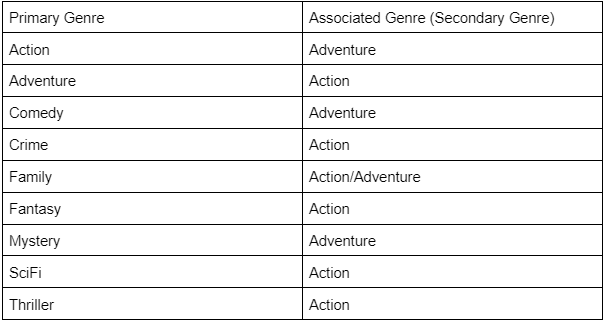

In [ ]:
# load all the genres and count the number of games based on the certificates
genres = ['Action', 'Adventure', 'Comedy', 'Crime', 'Family', 'Fantasy', 'Mystery', 'Sci-Fi', 'Thriller']
def get_cert_count_genre(genre):
  num_cert = data["certificate"].nunique()

  cert_genre = []
  cert_count = []
  for i in genre:
    cert = data.groupby('certificate')[i].apply(lambda x: (x == 1).sum()).reset_index(name='count')
    for x in range(0, num_cert):
      cert_count.append(cert["count"][x])

    cert_genre.append(cert_count)
    cert_count = []

  return cert_genre

cert_genre = get_cert_count_genre(genres)

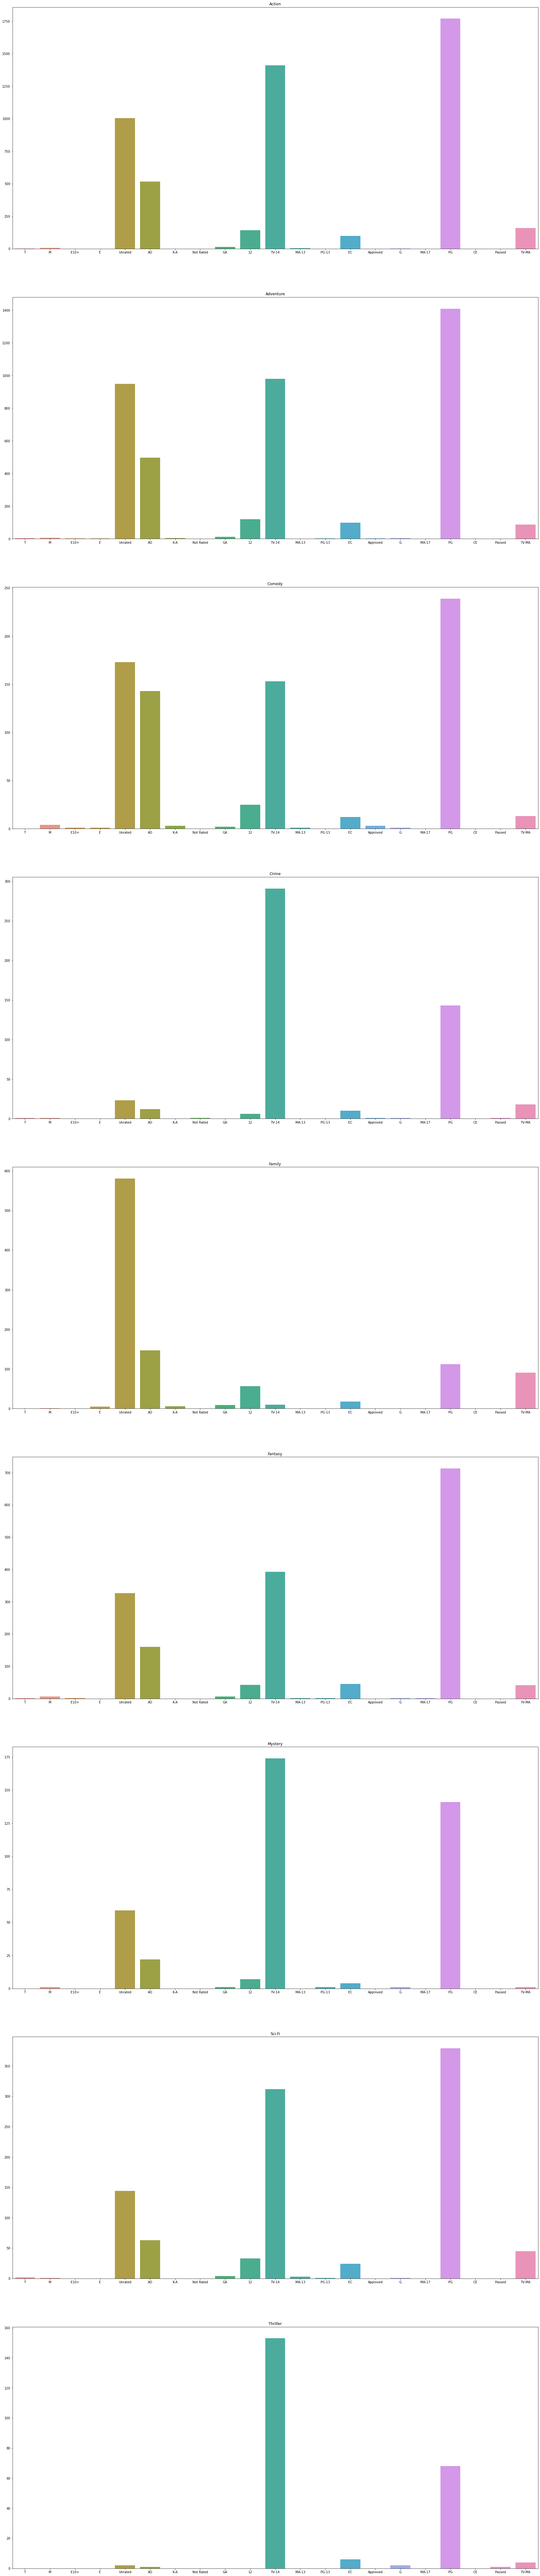

In [ ]:
certs = ['T', 'M', 'E10+', 'E', 'Unrated', 'AO', 'K-A', 'Not Rated',
       'GA', '12', 'TV-14', 'MA-13', 'PG-13', 'EC', 'Approved', 'G',
       'MA-17', 'PG', 'CE', 'Passed', 'TV-MA']

plt.figure(figsize = (30,150))

plt.subplot(9,1,1)
plt.title(genres[0])
sns.barplot(y = cert_genre[0], x = certs)

plt.subplot(9,1,2)
plt.title(genres[1])
sns.barplot(y = cert_genre[1], x = certs)

plt.subplot(9,1,3)
plt.title(genres[2])
sns.barplot(y = cert_genre[2], x = certs)

plt.subplot(9,1,4)
plt.title(genres[3])
sns.barplot(y = cert_genre[3], x = certs)

v=plt.subplot(9,1,5)
plt.title(genres[4])
sns.barplot(y = cert_genre[4], x = certs)

plt.subplot(9,1,6)
plt.title(genres[5])
sns.barplot(y = cert_genre[5], x = certs)

plt.subplot(9,1,7)
plt.title(genres[6])
sns.barplot(y = cert_genre[6], x = certs)

plt.subplot(9,1,8)
plt.title(genres[7])
sns.barplot(y = cert_genre[7], x = certs)

plt.subplot(9,1,9)
plt.title(genres[8])
sns.barplot(y = cert_genre[8], x = certs)

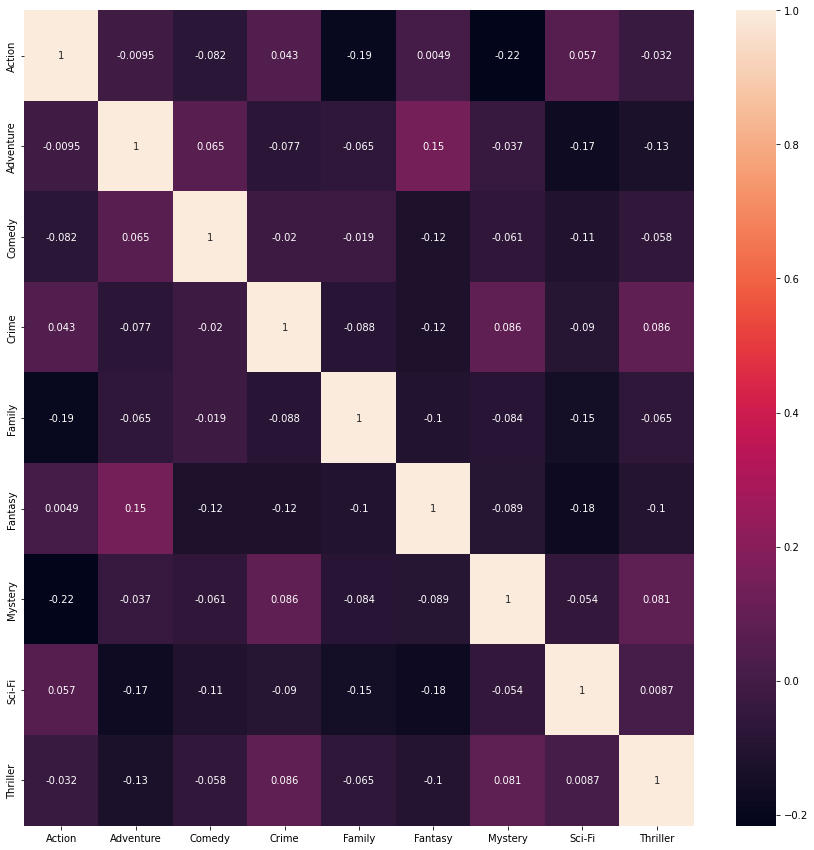

In [ ]:
plt.figure(figsize = (15,15))

sns.heatmap(data[genres].corr(), annot = True)

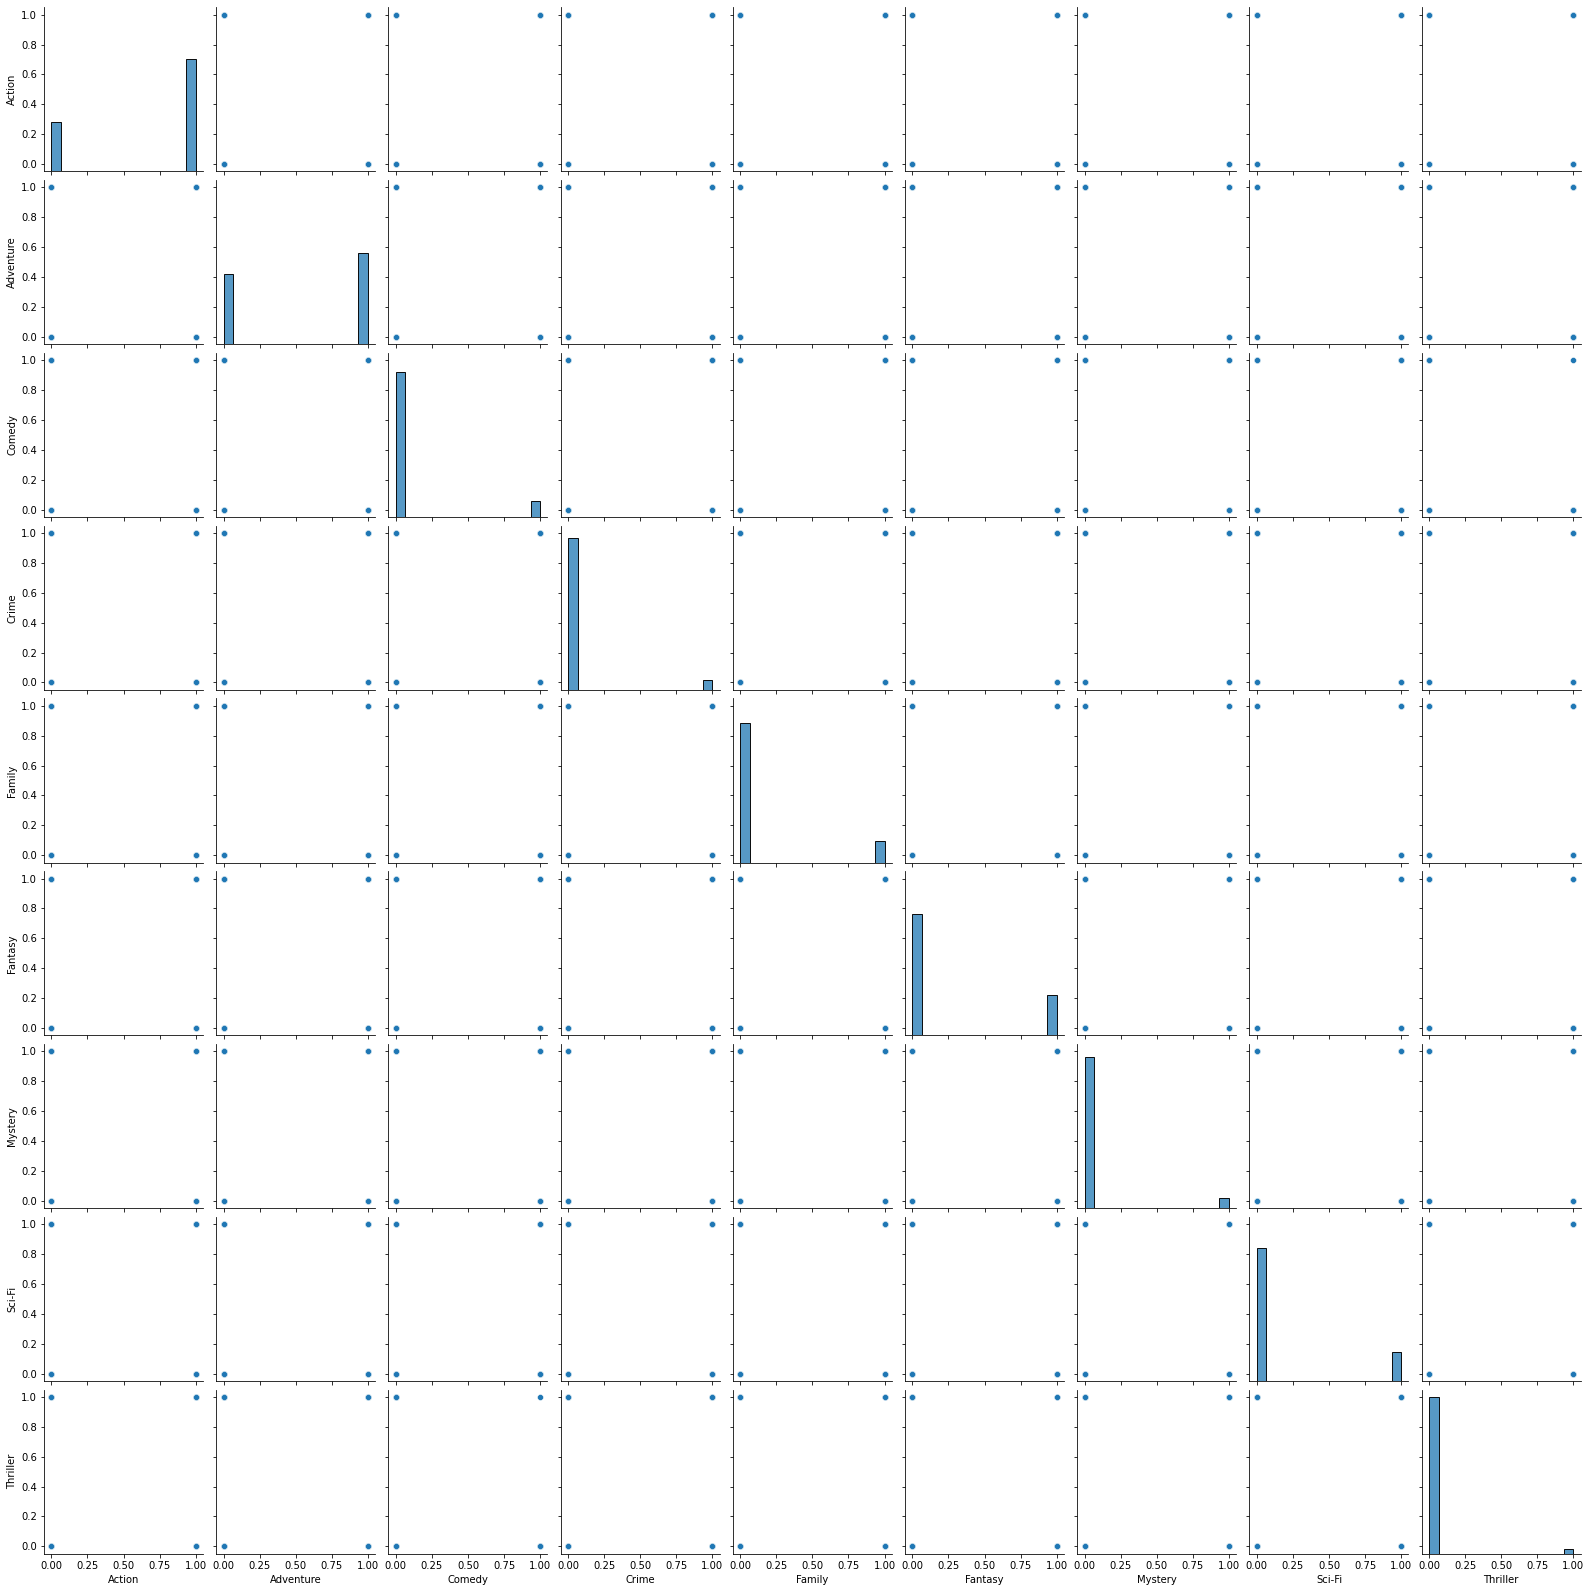

In [ ]:
# look at the correlation for the genres
columns = ['Action', 'Adventure', 'Comedy', 'Crime', 'Family', 'Fantasy', 'Mystery', 'Sci-Fi', 'Thriller']
sns.pairplot(data[columns])

### Deep dive into other independent variables (votes, rating, year)

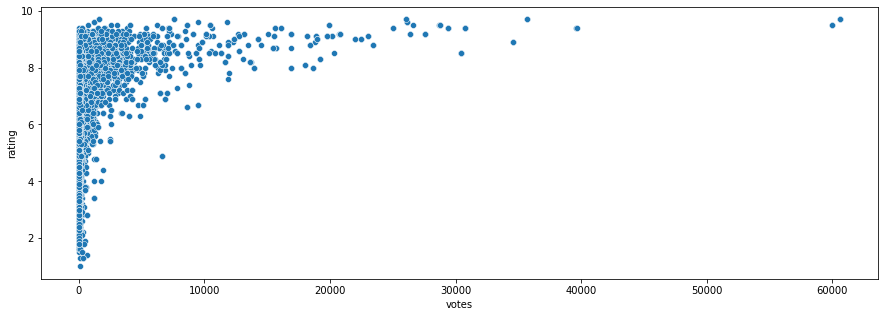

In [ ]:
plt.figure(figsize = (15,5))
sns.scatterplot(x = "votes", y = "rating", data = data)

<Figure size 1080x360 with 0 Axes>

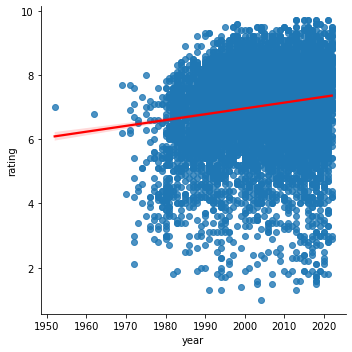

In [ ]:
plt.figure(figsize = (15,5))
sns.lmplot(x = "year", y = "rating", data = data, line_kws={'color': 'red'})

Based on the graph, as the year increases, the rating of the game would also increase.

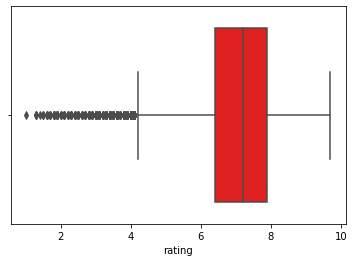

In [ ]:
sns.boxplot(x = 'rating', data = data, color = 'red')

In [ ]:
(data["rating"] < 4).sum()

275

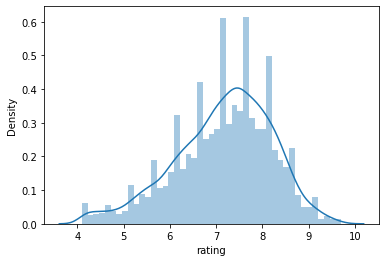

In [ ]:
# remove the outlier and observe the distribution
data = data[data["rating"] > 4]
sns.distplot(data["rating"])

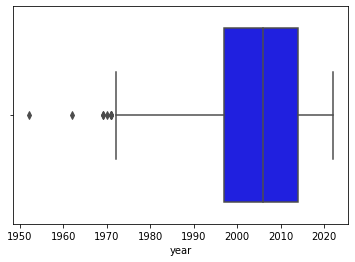

In [ ]:
sns.boxplot(x = 'year', data = data, color = 'blue')

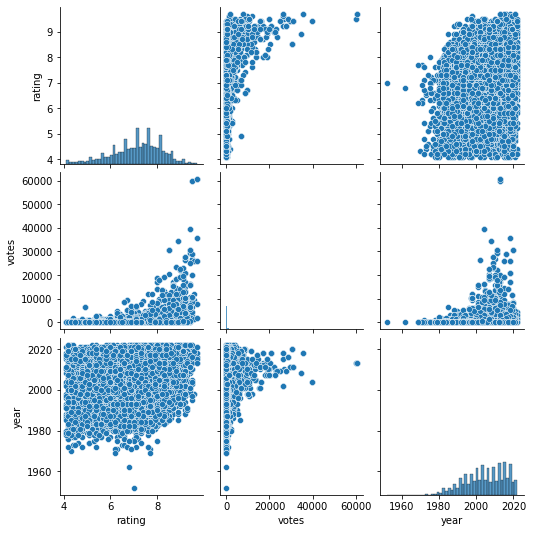

In [ ]:
# look at the correlation for rating, year and vote
columns = ["rating","votes", "year"]
sns.pairplot(data[columns])

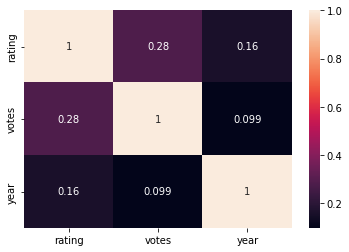

In [ ]:
sns.heatmap(data[columns].corr(), annot = True)

Source for weighted rating

https://www.kaggle.com/code/nyagami/a-deep-dive-into-the-video-games-dataset

In [ ]:
v = data.votes
m = 1000
R = data.rating
C = data.rating.mean()

# Create the weighted rating column (dependent variable)
data['weighted_rating'] = ((v/(v + m)) * R + ( m / (v + m)) * C)

In [ ]:
data.head(30)

,name,year,certificate,rating,votes,plot,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller,Years of Production,weighted_rating
0,Spider-Man,2018,T,9.2,20759,"When a new villain threatens New York City, Pe...",1,1,0,0,0,1,0,0,0,4,9.106225
1,Red Dead Redemption II,2018,M,9.7,35703,Amidst the decline of the Wild West at the tur...,1,1,0,1,0,0,0,0,0,4,9.630784
2,Grand Theft Auto V,2013,M,9.5,59986,Three very different criminals team up for a s...,1,0,0,1,0,0,0,0,0,9,9.461623
3,God of War,2018,M,9.6,26118,"After wiping out the gods of Mount Olympus, Kr...",1,1,0,0,0,0,0,0,0,4,9.510007
4,Uncharted 4: A Thief's End,2016,T,9.5,28722,Thrown back into the dangerous underworld he'd...,1,1,0,0,0,0,0,0,0,6,9.421256
5,The Last of Us: Part II,2020,M,8.5,30460,"Five years after the events of The Last of Us,...",1,1,0,0,0,0,0,0,0,2,8.457392
6,Horizon Forbidden West,2022,T,9.2,2979,Aloy treks into an arcane region and faces new...,1,1,0,0,0,0,1,0,0,0,8.687198
7,The Last of Us,2013,M,9.7,60590,"In a hostile, post-pandemic world, Joel and El...",1,1,0,0,0,0,0,0,0,9,9.658752
8,Detroit: Become Human,2018,M,9.2,16907,Take control of three androids in their quest ...,1,1,0,0,0,0,0,0,0,4,9.086054
9,Death Stranding,2019,M,8.8,8136,Deliveryman Sam Porter must travel across a ra...,1,1,0,0,0,0,0,0,0,3,8.620442


In [ ]:
# normalize feature
cols = ['year','votes','rating','Action', 'Adventure', 'Comedy', 'Crime', 'Family', 'Fantasy', 'Mystery', 'Sci-Fi', 'Thriller']

for i in cols:
  arr_norm = preprocessing.normalize([data[i]])
  arr_norm = arr_norm.reshape(-1)
  data[i] = arr_norm

In [ ]:
data.head()

,name,year,certificate,rating,votes,plot,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller,Years of Production,weighted_rating
0,Spider-Man,0.009478,T,0.011973,0.069446,"When a new villain threatens New York City, Pe...",0.011285,0.0125,0.0,0.000000,0.0,0.018742,0.0,0.0,0.0,4,9.106225
1,Red Dead Redemption II,0.009478,M,0.012624,0.119438,Amidst the decline of the Wild West at the tur...,0.011285,0.0125,0.0,0.038984,0.0,0.000000,0.0,0.0,0.0,4,9.630784
2,Grand Theft Auto V,0.009455,M,0.012363,0.200672,Three very different criminals team up for a s...,0.011285,0.0000,0.0,0.038984,0.0,0.000000,0.0,0.0,0.0,9,9.461623
3,God of War,0.009478,M,0.012494,0.087373,"After wiping out the gods of Mount Olympus, Kr...",0.011285,0.0125,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,4,9.510007
4,Uncharted 4: A Thief's End,0.009469,T,0.012363,0.096084,Thrown back into the dangerous underworld he'd...,0.011285,0.0125,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,6,9.421256


In [ ]:
data.isnull().sum()

name                      0
year                      0
certificate            4801
rating                    0
votes                     0
plot                      0
Action                    0
Adventure                 0
Comedy                    0
Crime                     0
Family                    0
Fantasy                   0
Mystery                   0
Sci-Fi                    0
Thriller                  0
Years of Production       0
weighted_rating           0
dtype: int64

In [ ]:
# certificate column contains most of the null values so drop the entire column
data.drop(['certificate'], inplace = True, axis = 1)

In [ ]:
# no more null values
print(data.shape)
data.isnull().sum()

(11276, 16)


name                   0
year                   0
rating                 0
votes                  0
plot                   0
Action                 0
Adventure              0
Comedy                 0
Crime                  0
Family                 0
Fantasy                0
Mystery                0
Sci-Fi                 0
Thriller               0
Years of Production    0
weighted_rating        0
dtype: int64

In [ ]:
# shuffle the data
shuffled_data = shuffle(data, random_state = 100)
X = shuffled_data[['rating','year', 'votes','Action', 'Adventure', 'Comedy', 'Crime', 'Family', 'Fantasy', 'Mystery', 'Sci-Fi', 'Thriller']]
Y = shuffled_data['weighted_rating']

In [ ]:
# split (train/validation) and test
X_train_vali, X_test, y_train_vali, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 100)

#split train and validation
X_train, X_vali, y_train, y_vali = train_test_split(X_train_vali, y_train_vali, test_size = 0.2, random_state = 100)

# for statsmodel purpose
train_data = pd.merge(y_train, X_train, left_index = True, right_index = True)
train_data.rename(columns={'Sci-Fi':'SciFi'},inplace= True)
df_dependent = train_data['weighted_rating']
df_independent = train_data.drop(labels = ['weighted_rating'],axis =1)
featureFormula = "+".join(df_independent.columns)
sm_formula = "weighted_rating ~ " + featureFormula

In [ ]:
results = sm.ols(sm_formula, data=train_data).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        weighted_rating   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     1095.
Date:                Mon, 28 Nov 2022   Prob (F-statistic):               0.00
Time:                        02:32:41   Log-Likelihood:                 1273.3
No. Observations:                7216   AIC:                            -2521.
Df Residuals:                    7203   BIC:                            -2431.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.5887      0.469     18.302      0.0

Based on the summary results, from the P-value of "Action", it is 0.000 (0%). The significance level of our study is 0.05 (5%) which the P-value is lower than the significance level

In [ ]:
def train_evaluate_ML(train_model):
  model = train_model
  model_name = type(model).__name__
  print(model_name)
  model.fit(X_train, y_train)
  predict = model.predict(X_vali)
  print("R2 Score: ", r2_score(predict, y_vali))
  print("Mean Square Error: ", mean_squared_error(predict, y_vali))
  print("Mean Absolute Error: ", mean_absolute_error(predict, y_vali))

  sns.scatterplot(y_vali,predict)
  plt.plot(y_vali,y_vali, color = "red")
  plt.title("Model Performance with predict values and actual values")
  plt.xlabel("Real Values")
  plt.ylabel("predicted values")
  plt.show()
  print("\n")

LinearRegression
R2 Score:  0.47746815179227253
Mean Square Error:  0.04849031142611323
Mean Absolute Error:  0.1306478979374524


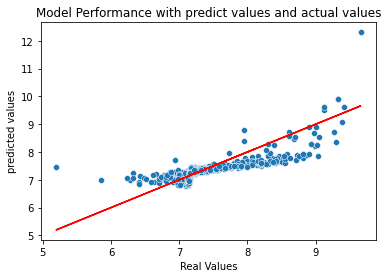



DecisionTreeRegressor
R2 Score:  0.9978586071914521
Mean Square Error:  0.00026308559573268614
Mean Absolute Error:  0.004408373270989982


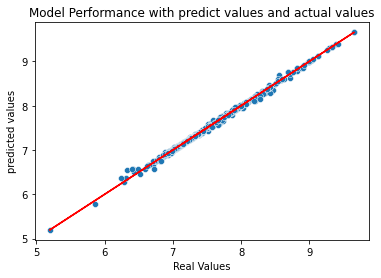



KNeighborsRegressor
R2 Score:  0.7937426232680534
Mean Square Error:  0.01976781557574123
Mean Absolute Error:  0.0452292101931171


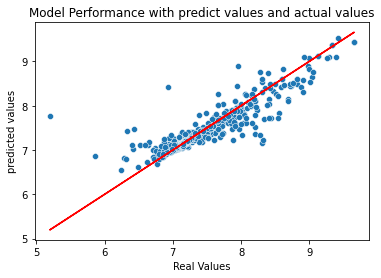

In [ ]:
train_evaluate_ML(LinearRegression())
train_evaluate_ML(DecisionTreeRegressor())
train_evaluate_ML(KNeighborsRegressor())

Based on the results, it shows that Decision Tree performs the best, followed by KNeighbors and the model that performs the least is Linear Regression

R2 Score:  0.9979552509577778
Mean Square Error:  0.00024871836137887565
Mean Absolute Error:  0.0045699604517899905


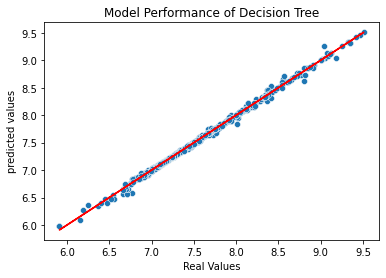

In [ ]:
test_model = DecisionTreeRegressor()
test_model.fit(X_train, y_train)
predict = test_model.predict(X_test)
print("R2 Score: ", r2_score(predict, y_test))
print("Mean Square Error: ", mean_squared_error(predict, y_test))
print("Mean Absolute Error: ", mean_absolute_error(predict, y_test))

sns.scatterplot(y_test,predict)
plt.plot(y_test, y_test, color = "red")
plt.title("Model Performance of Decision Tree")
plt.xlabel("Real Values")
plt.ylabel("predicted values")
plt.show()